## Setup


In [1]:
# Initializing PiML object
from piml import Experiment
exp = Experiment()

2023-04-18 13:10:30.920323: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-18 13:10:30.925663: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-18 13:10:30.925682: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import *

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

## Load data

In [3]:
# Loading data
#exp.data_loader()
# or using panda to read datafile
import pandas as pd
data = pd.read_csv('/commons/users/u783567/data/creditdat.csv')
#data = pd.read_csv('C:/Users/U783567/Documents/workshop/credit_data4.xls')
exp.data_loader(data=data)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,Mortgage,Balance,Amount Past Due,Delinquency Status,Credit Inquiry,Open Trade,Utilization,Gender,Race,Approved
0,196153.90,2115.19,0.00,0.0,0.0,0.0,0.759069,1.0,0.0,1.0
1,149717.49,2713.77,1460.57,1.0,1.0,1.0,0.402820,1.0,0.0,1.0
2,292626.34,2209.01,0.00,0.0,0.0,0.0,0.684272,1.0,1.0,1.0
3,264812.52,21.68,0.00,0.0,0.0,0.0,0.037982,0.0,0.0,0.0
4,236374.39,1421.49,1290.85,2.0,0.0,0.0,0.231110,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
19995,236123.54,3572.34,0.00,0.0,0.0,0.0,0.896326,1.0,1.0,0.0
19996,374572.72,3560.24,0.00,0.0,0.0,0.0,0.648893,1.0,1.0,0.0
19997,279238.55,101.75,0.00,0.0,0.0,0.0,0.068079,0.0,1.0,0.0
19998,149678.27,439.46,214.36,2.0,1.0,0.0,0.311219,0.0,0.0,1.0


## Data summary and exploratory analysis

#### Exclude protected features

In [4]:
exp.data_summary(feature_exclude = ['Gender','Race'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='Data Shape:(20000, 10)')

In [5]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

## Prepare data for supervised learning

In [6]:
exp.data_prepare(target='Approved', task_type='Classification', test_ratio=0.2, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,0,1
0,Excluded columns,"[Gender, Race]"
1,Target variable,Approved
2,Sample weight,None
3,Task type,Classification
4,Split method,Random
5,Test ratio,0.2
6,Random state,0


## Model training

#### train four internal piml models and an external XGB model

In [7]:
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [8]:
xgbtuned = XGBClassifier(n_estimators = 400,max_depth = 6,learning_rate=0.3, random_state = 0)
exp.model_train(model = xgbtuned, name = 'xgb_ext')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register xgb_ext Done</p>")

In [9]:
for mod in ['GAMI-Net','EBM','ReLU-DNN','XGB2','xgb_ext']:
    print(mod)
    exp.model_diagnose(model = mod, show = 'accuracy_table')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

GAMI-Net


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.6931,0.7577,0.7738,0.6704,0.7184
Test,0.6900,0.7564,0.7665,0.6731,0.7168
Gap,-0.0031,-0.0013,-0.0073,0.0027,-0.0017


EBM


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.6994,0.7670,0.7750,0.6774,0.7229
Test,0.6930,0.7555,0.7680,0.6761,0.7191
Gap,-0.0064,-0.0115,-0.0071,-0.0013,-0.0038


ReLU-DNN


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.6959,0.7583,0.7916,0.6685,0.7248
Test,0.6910,0.7559,0.7797,0.6703,0.7209
Gap,-0.0049,-0.0024,-0.0119,0.0018,-0.0040


XGB2


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.7035,0.7732,0.7637,0.6859,0.7227
Test,0.6827,0.7540,0.7440,0.6715,0.7059
Gap,-0.0208,-0.0192,-0.0197,-0.0144,-0.0168


xgb_ext


,ACC,AUC,Recall,Precision,F1
,,,,,
Train,0.9169,0.9792,0.9568,0.8878,0.9210
Test,0.6570,0.7122,0.7015,0.6536,0.6767
Gap,-0.2599,-0.2670,-0.2552,-0.2342,-0.2443


#### According to AUC metric (threshold independent ) 

##### GAMI-Net > FFNN > EBM > XGB2 > xgb_ext

## Model Explainability

feature imp

GAMI-NET : Dq > uti> mort >bal> inq

EBM : uti > dq > mort > amount > bal

ReLU : dq > uti > mort > bal > inq

XGB2 : amount > uti > mort > bal > dq 

xgb_ext : uti > bal > mort > amount > dq



In [10]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

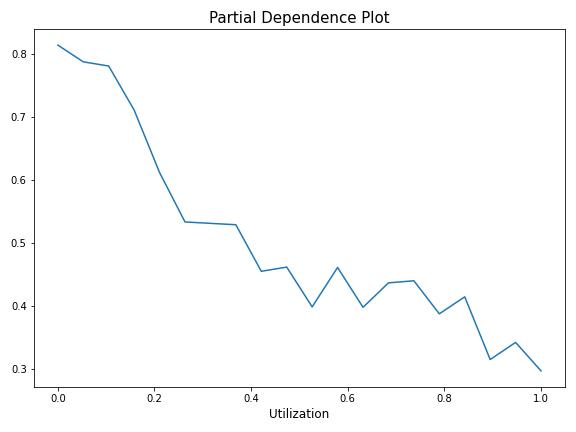

In [11]:
exp.model_explain(model = 'xgb_ext', show = 'pdp',uni_feature = 'Utilization')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

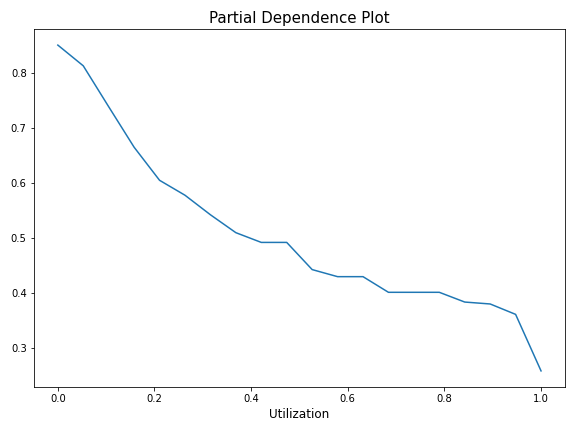

In [12]:
exp.model_explain(model = 'XGB2', show = 'pdp',uni_feature = 'Utilization')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

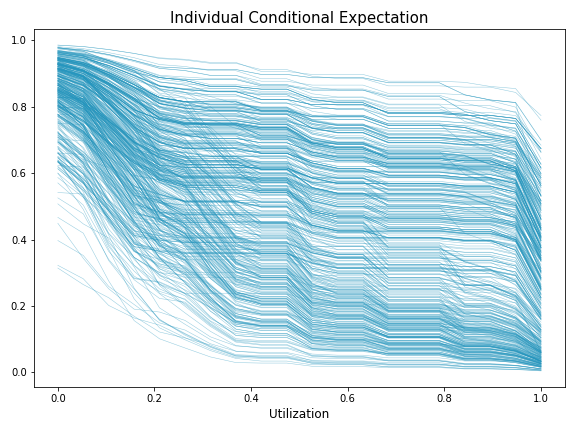

In [13]:
exp.model_explain(model = 'XGB2', show = 'ice',uni_feature = 'Utilization')

In [14]:
exp.model_interpret() 
## uti indeed has strong interaction with amount past due for xgb2

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [15]:
exp.model_interpret() 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

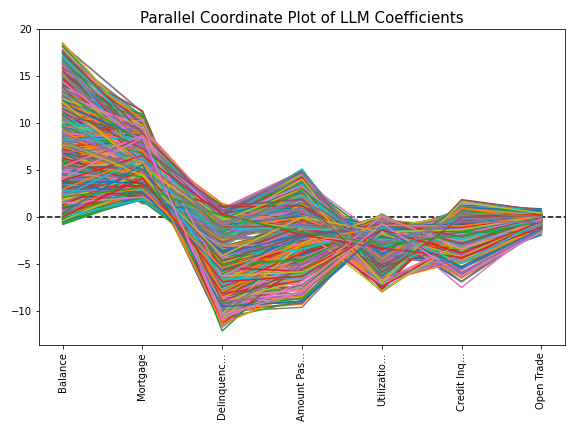

In [19]:
exp.model_interpret(model = 'ReLU-DNN', show = 'llm_pc') 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

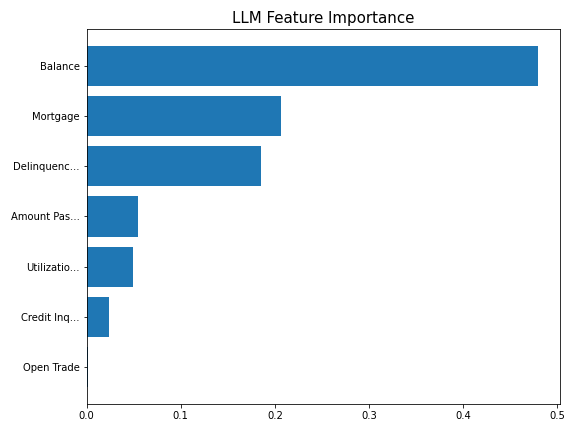

In [20]:
exp.model_interpret(model = 'ReLU-DNN', show = 'global_fi') 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

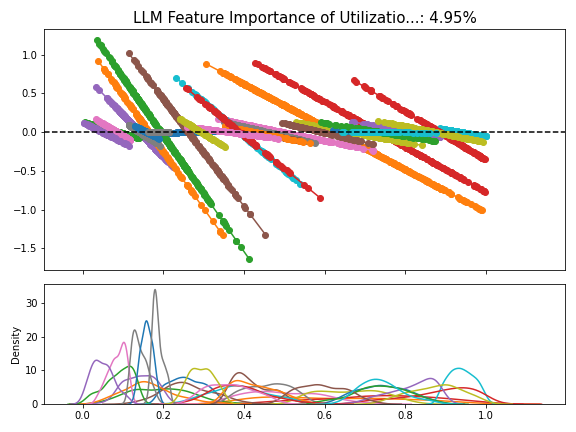

In [17]:
exp.model_interpret(model = 'ReLU-DNN', show = 'global_effect_plot', uni_feature = 'Utilization') 

In [18]:
exp.model_interpret(model = 'ReLU-DNN', show = 'llm_summary') 

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,Count,Response Mean,Response Std,Local AUC,Global AUC
0,517.0,0.5493,0.4980,0.5796,0.7070
1,490.0,0.1204,0.3258,0.5448,0.6907
2,317.0,0.4795,0.5004,0.6360,0.6528
3,263.0,0.0646,0.2464,0.7147,0.6968
4,252.0,0.4841,0.5007,0.6255,0.5980
...,...,...,...,...,...
2341,1.0,1.0000,NaN,NaN,0.7197
2342,1.0,0.0000,NaN,NaN,0.7135
2343,1.0,0.0000,NaN,NaN,0.6916
2344,1.0,1.0000,NaN,NaN,0.7111


In [31]:
# Model Diagnostics
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [32]:
# Model Comparison
exp.model_compare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [30]:
exp.model_fairness()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…